<a href="https://colab.research.google.com/github/ChanukaWelagedara/EE5253_2023_Code_Group18/blob/main/EE5253_2023_Code_Group18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Video Game Sales Prediction
##Group Number:
      18
##Stunet Information:
      ###EG/2020/3847 Bandara U.G.R.S
      ###EG/2020/4276 Welagedara B.M.K.C


#Import Libraries

In [2]:
# Importing necessary libraries for data manipulation, visualization, and machine learning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

# Importing preprocessing tools
from sklearn.preprocessing import LabelEncoder

# Importing regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor


# Importing model evaluation metrics
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, f1_score, precision_score, recall_score

# Importing tools for model selection and optimization
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

# Importing sparse matrix generation tool
from scipy.sparse import random

# Importing visualization tools
import plotly.express as px

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Data

In [4]:
train=pd.read_csv('/content/drive/MyDrive/Machine Learning/vgsales.csv')
df=train.copy()

#InFormation of the Data Set

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.tail()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 16598 rows and 11 columns


In [10]:
unique_platforms = df['Platform'].unique()
print(unique_platforms)


['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


####Information About the Different type of data

In [11]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)
df['Global_Sales'].value_counts()

Total number of numerical columns are  1
There names are as follows:  ['Rank']


0.02    1071
0.03     811
0.04     645
0.05     632
0.01     618
        ... 
5.01       1
5.05       1
5.07       1
5.11       1
3.16       1
Name: Global_Sales, Length: 623, dtype: int64

In [12]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)


Total number of float64 columns are  6
There name are as follow:  ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [13]:
objects_lst = list(df.select_dtypes(include='object').columns)
print("Total number of categorical columns are ", len(objects_lst))
print("Their names are as follows: ", objects_lst)


Total number of categorical columns are  4
Their names are as follows:  ['Name', 'Platform', 'Genre', 'Publisher']


###Information About the Data

In [14]:
df.std()

Rank            4791.853933
Year               5.828981
NA_Sales           0.816683
EU_Sales           0.505351
JP_Sales           0.309291
Other_Sales        0.188588
Global_Sales       1.555028
dtype: float64

In [15]:
df.var()

Rank            2.296186e+07
Year            3.397702e+01
NA_Sales        6.669712e-01
EU_Sales        2.553799e-01
JP_Sales        9.566070e-02
Other_Sales     3.556559e-02
Global_Sales    2.418112e+00
dtype: float64

In [16]:
df.mean()

Rank            8300.605254
Year            2006.406443
NA_Sales           0.264667
EU_Sales           0.146652
JP_Sales           0.077782
Other_Sales        0.048063
Global_Sales       0.537441
dtype: float64

In [17]:
df.median()

Rank            8300.50
Year            2007.00
NA_Sales           0.08
EU_Sales           0.02
JP_Sales           0.00
Other_Sales        0.01
Global_Sales       0.17
dtype: float64

In [18]:
df.mode()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Need for Speed: Most Wanted,DS,2009.0,Action,Electronic Arts,0.0,0.0,0.0,0.0,0.02
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16594,16597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16595,16598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16596,16599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Information Abpot the Duplications

In [19]:
duplication = df.pivot_table(index=['Name','Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], aggfunc='size')

print(duplication)

Name                                     Rank   Year    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
'98 Koshien                              4756   1998.0  0.15      0.10      0.12      0.03         0.41            1
.hack//G.U. Vol.1//Rebirth               8359   2006.0  0.00      0.00      0.17      0.00         0.17            1
.hack//G.U. Vol.2//Reminisce             7109   2006.0  0.11      0.09      0.00      0.03         0.23            1
.hack//G.U. Vol.2//Reminisce (jp sales)  8604   2006.0  0.00      0.00      0.16      0.00         0.16            1
.hack//G.U. Vol.3//Redemption            8306   2007.0  0.00      0.00      0.17      0.00         0.17            1
                                                                                                                  ..
thinkSMART: Chess for Kids               16417  2011.0  0.01      0.00      0.00      0.00         0.01            1
uDraw Studio                             628    2010.0  1.67      0.5

In [20]:
df2 = df.groupby(df.columns.tolist(), as_index=False).size()
print(df2)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16286  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16287  16597                     Men in Black II: Alien Escape       GC   
16288  16598  SCORE International Baja 1000: The Official Game      PS2   
16289  16599                                        Know How 2       DS   
16290  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

In [21]:
dup_Count =  len(df)-len(df.drop_duplicates())
dup_Count

0

In [22]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


Information about Null values

In [23]:
Null_Counts = df.isnull().sum()
Null_Counts

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Information Vizuvalizations

Text(0.5, 1.0, 'Top 10 games in global sales')

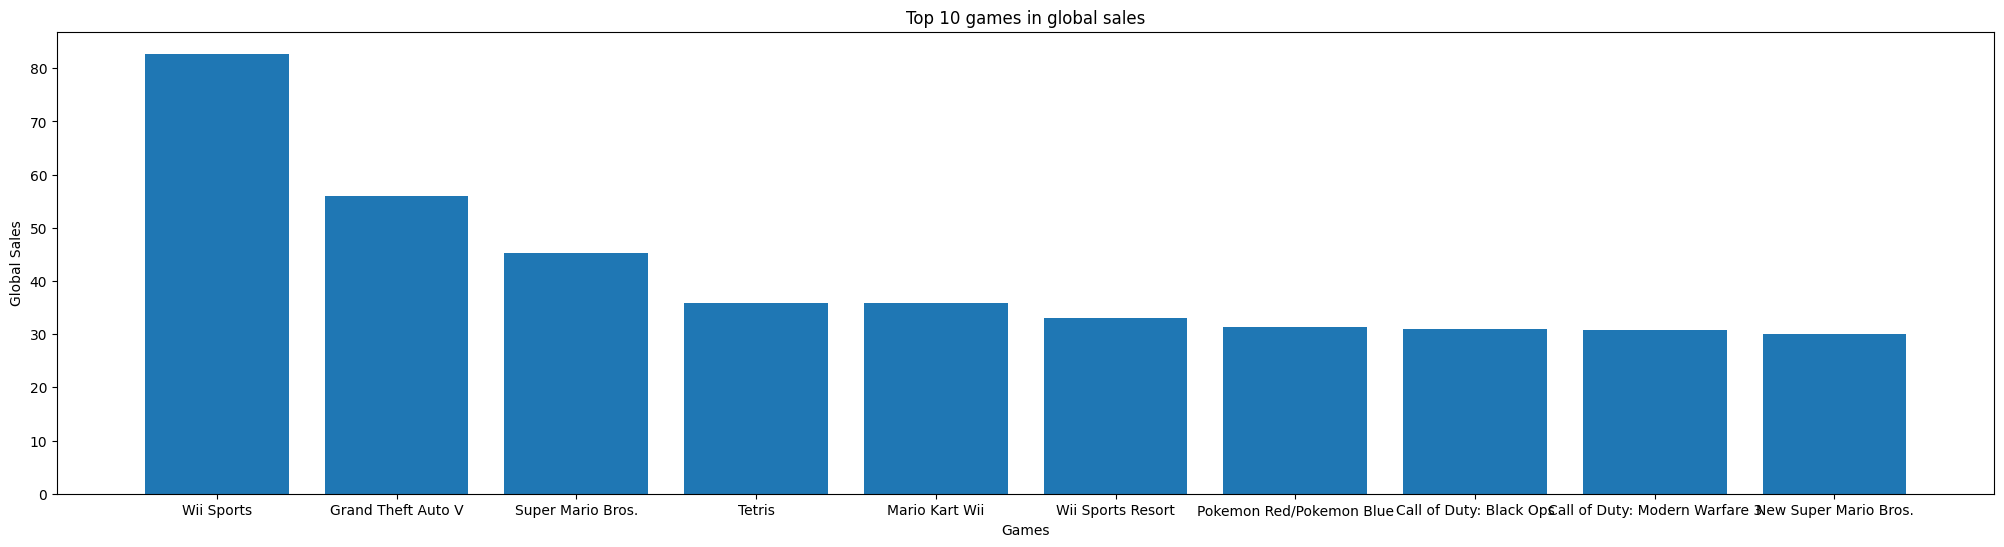

In [24]:
#The Top 10 Games in Gobal sale
max=df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)
max=max.reset_index()
max = max.sort_values("Global_Sales",ascending =False)
max = max[:10]
plt.figure(figsize=(25, 6))
plt.bar(max['Name'] ,max['Global_Sales'] )
plt.xlabel('Games')
plt.ylabel('Global Sales')

plt.title('Top 10 games in global sales')

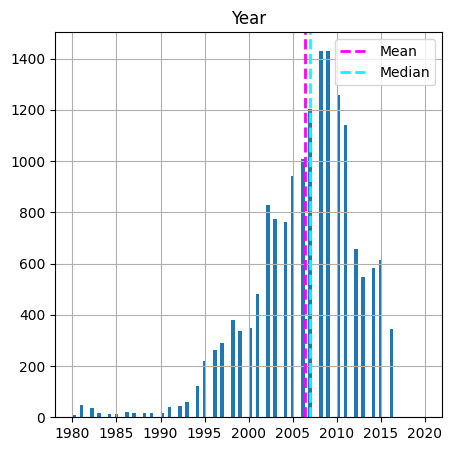

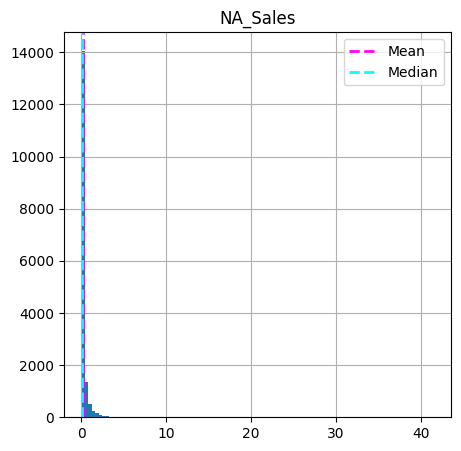

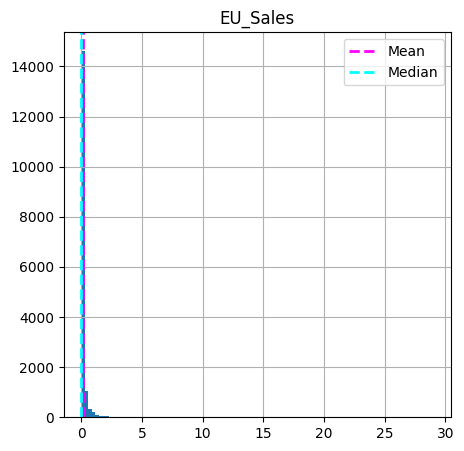

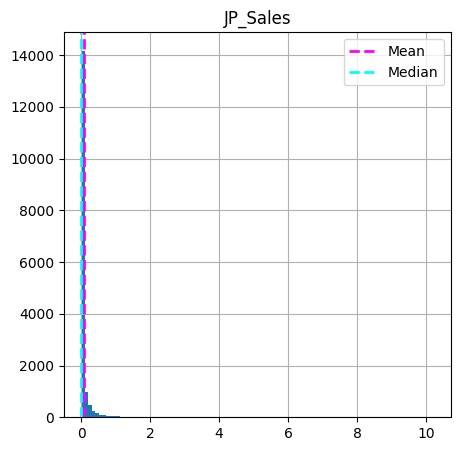

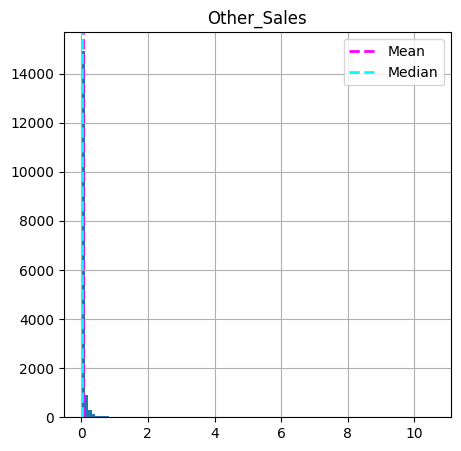

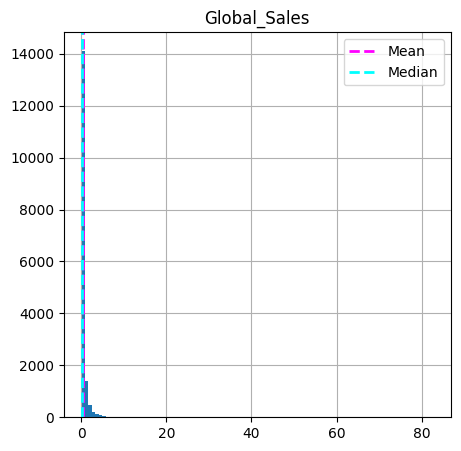

Total number of categorical columns are  4
Their names are as follows:  ['Name', 'Platform', 'Genre', 'Publisher']


In [25]:
float_columns = df.select_dtypes(include='float64')

# Check if there are 6 float64 columns
if len(float_columns.columns) == 6:
    for col in float_columns:
        fig = plt.figure(figsize=(5, 5))
        ax = fig.gca()
        feature = float_columns[col]
        feature.hist(bins=100, ax=ax)
        ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
        ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
        ax.set_title(col)
        ax.legend()
    plt.show()
else:
    print("The number of float64 columns is not 6.")

# Display information about categorical columns
objects_lst = list(df.select_dtypes(include='object').columns)
print("Total number of categorical columns are ", len(objects_lst))
print("Their names are as follows: ", objects_lst)

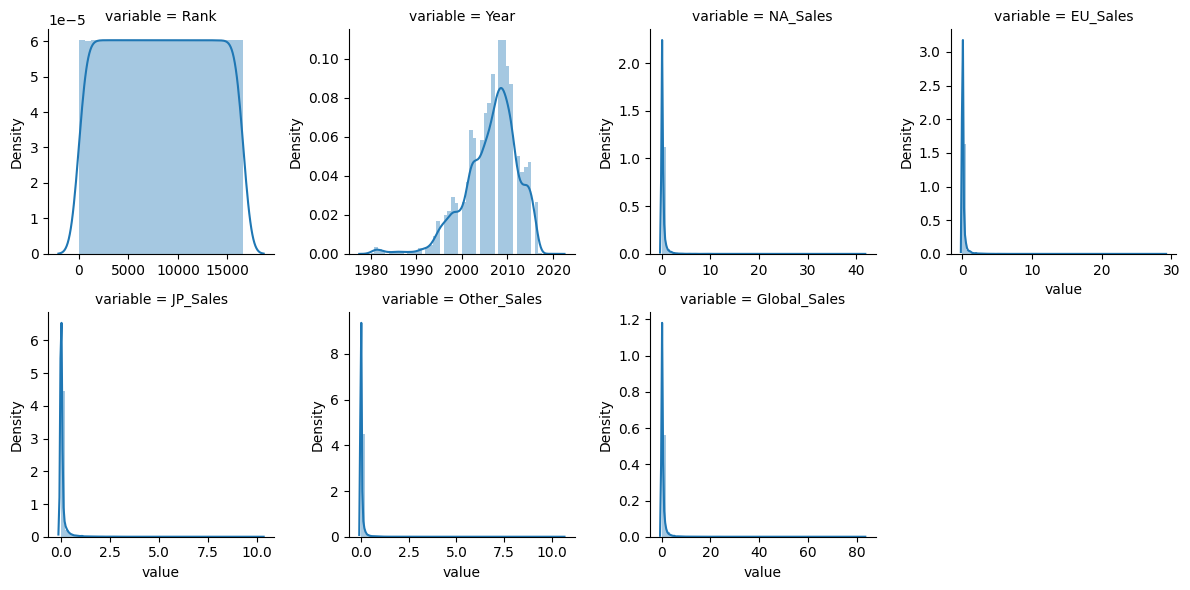

In [26]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [27]:
jp_sales=df['JP_Sales'].sum()
na_sales=df['NA_Sales'].sum()
eu_sales=df['EU_Sales'].sum()
other_sales=df['Other_Sales'].sum()


labels=['Japan','North America (NA)','European Union (EU)','Other countries']
vales=[jp_sales, na_sales, eu_sales, other_sales]
vales
fig = px.pie( values=vales, names=labels,  title='Percentage of Global Sales According To Categories')
fig.show()

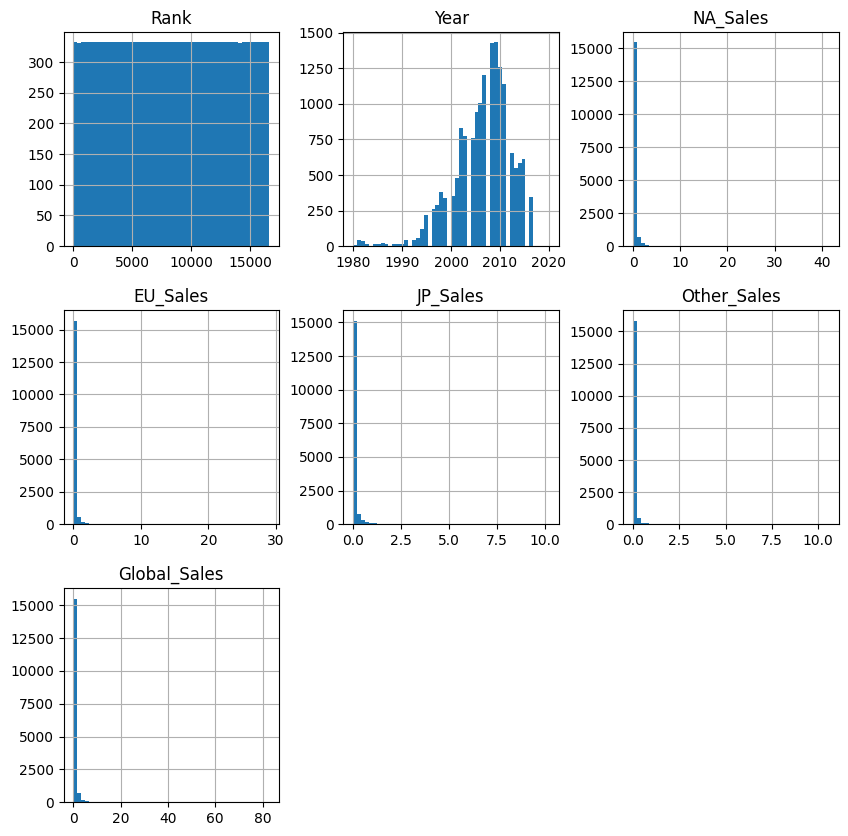

In [28]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10,10))
plt.show()

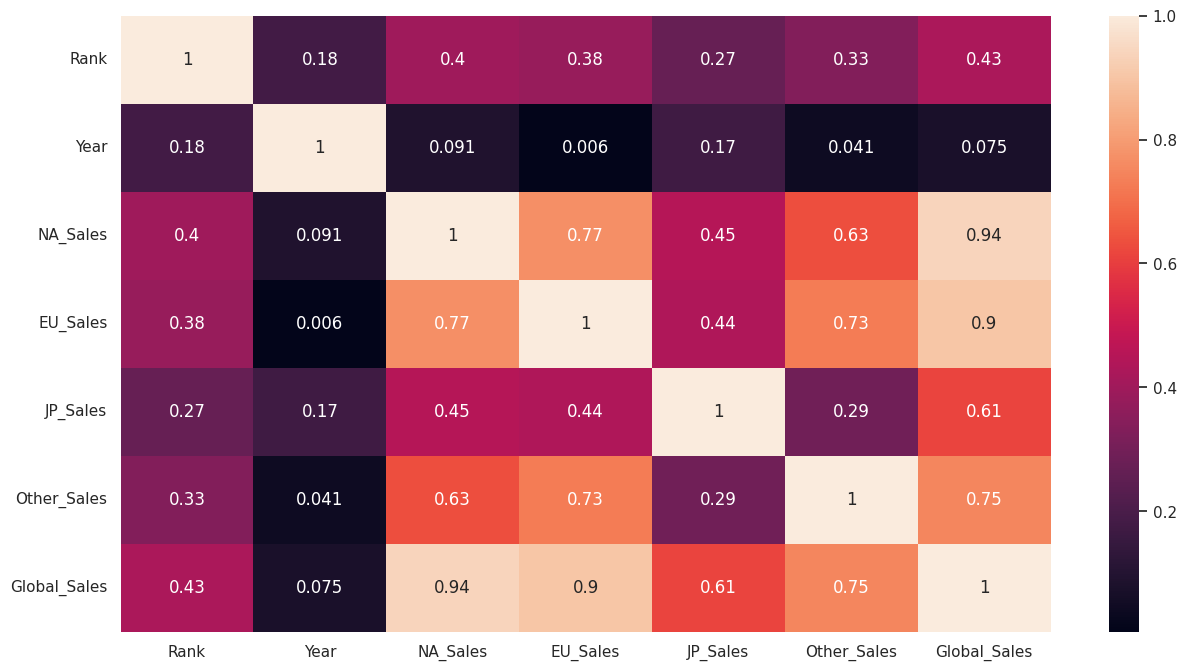

In [29]:
sns.set(rc = {'figure.figsize':(15,8)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True)
plt.show()

<Figure size 2500x2500 with 0 Axes>

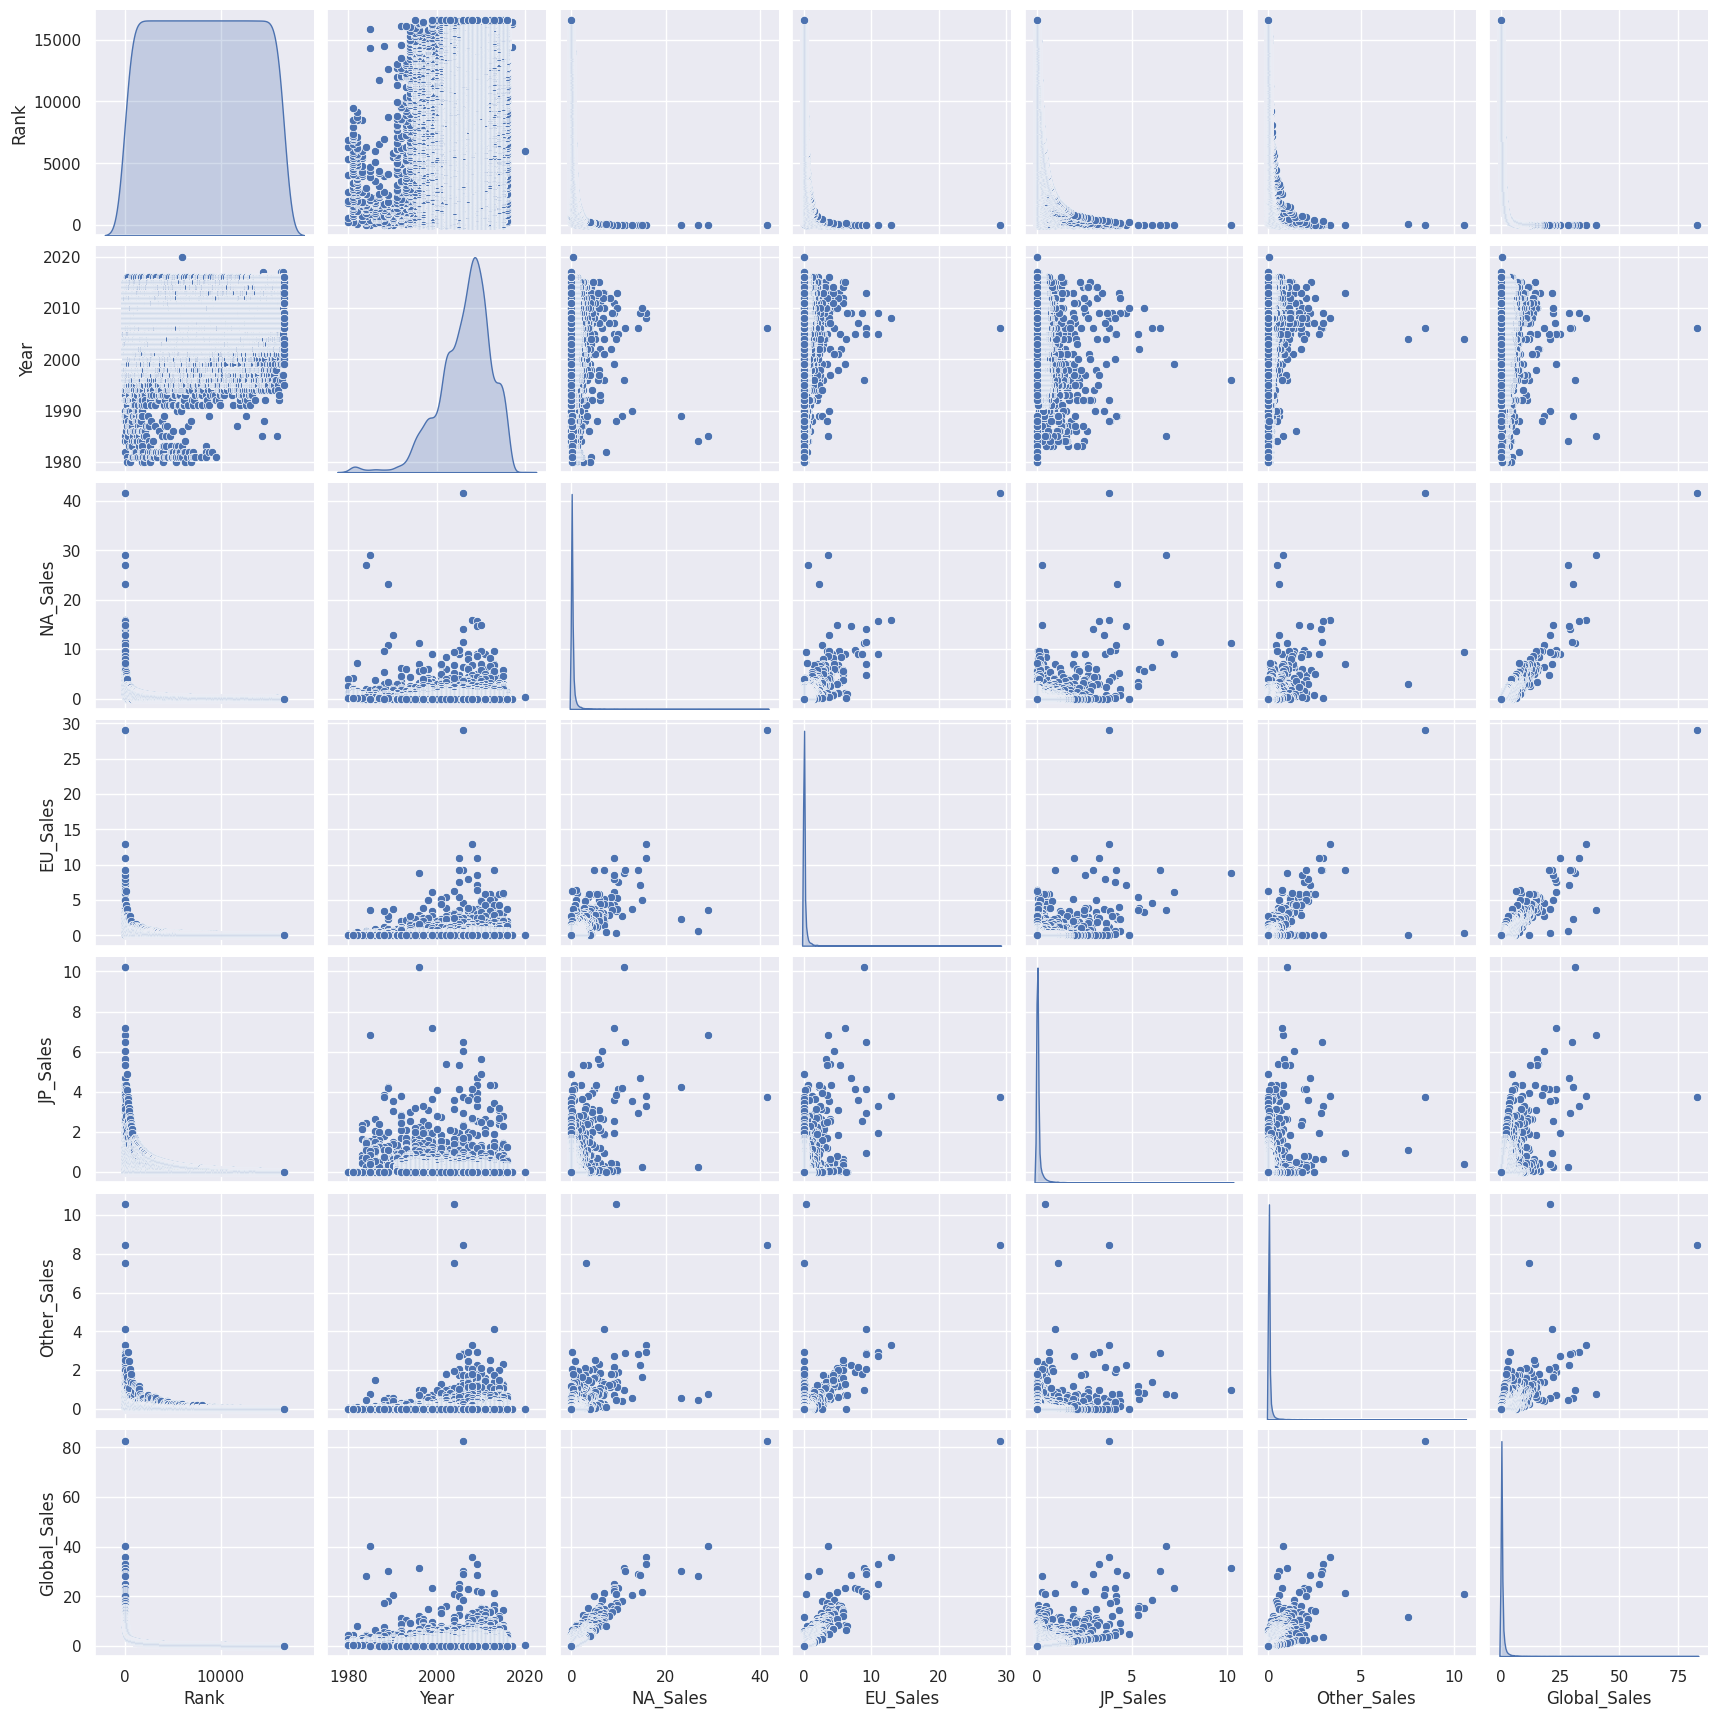

In [30]:
plt.figure(figsize=(25,25))
pair=sns.pairplot(df[:-3], diag_kind='kde')
plt.show()

#Pre Processing

In [31]:
#Drop The Nmae Ctegeri
df = df.drop(['Name'], axis=1)

In [32]:
df.columns

Index(['Rank', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Handaling The Missing Values

In [33]:
df.isnull().sum()

Rank              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

##Check the duplicate values

In [34]:
df.dropna(inplace=True)

In [35]:
df.duplicated().sum()

0

## Handeling the categorical Values


In [36]:
le = LabelEncoder()
df.Platform = le.fit_transform(df.Platform)
df.Genre = le.fit_transform(df.Genre)
df.Publisher = le.fit_transform(df.Publisher)

In [37]:
df['Platform'].unique()

array([26, 11,  5,  4, 28, 17, 16, 23,  6,  2, 18, 10, 15, 29, 13,  0, 19,
       30,  7, 27,  8,  3, 20, 21, 22, 25, 12, 24,  1,  9, 14])

In [38]:
df['Genre'].unique()

array([10,  4,  6,  7,  5,  3,  8,  9,  0,  2,  1, 11])

In [39]:
df['Publisher'].unique()

array([359, 323, 493, 455,  21, 524,  66, 138, 445, 465,  53,   6,  85,
       177, 275, 457, 464, 288, 540, 547, 527, 137, 426, 543, 144, 347,
       385, 214, 487, 164,  17, 292, 126, 296,  91, 424, 281,  40, 325,
       253, 120,  10, 343, 521, 391, 308, 237, 499, 532,  13, 330, 241,
       528, 462, 531,  23,  63, 109, 378, 425, 537, 219, 198, 199, 550,
       206, 101, 224,  94, 430,  55, 485,  12, 565,  18, 459,   4, 419,
       348, 160,  30,  71, 460, 303, 372, 564, 413,  88, 142, 472,  97,
       434, 490,  27, 176, 322, 400, 450, 511, 441, 273, 182, 508, 299,
       191, 334, 398,  84, 495, 104, 436, 414, 574, 420, 525, 443, 246,
       341,  87, 463,   2,  58, 223, 367, 314, 365,  67, 513, 461, 256,
       362, 277, 415, 233, 506, 170, 432, 318, 305, 227, 433, 456, 526,
       193, 552,  61, 381, 515, 279, 232, 491, 263, 122, 146, 557, 238,
       481,  83,  44, 186, 324, 255,  36, 553,  22, 383, 422, 556, 184,
       544, 368, 501, 148,  60, 272, 304, 503, 213, 133, 489, 50

In [40]:

corr


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,0.401362,0.379123,0.267785,0.332986,0.427407
Year,0.178814,1.000000,0.091402,0.006014,0.169316,0.041058,0.074735
NA_Sales,0.401362,0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,0.267785,0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,0.427407,0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


In [41]:
#X= df.drop(['Platform','Year','Genre','Publisher'],axis=1)
X = df.drop(["NA_Sales",	"EU_Sales",	"JP_Sales"	,"Other_Sales",	"Global_Sales"],axis=1)
#X = df.drop(["EU_Sales",	"JP_Sales"	,"Other_Sales",	"Global_Sales"],axis=1)
y = df["Global_Sales"]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rank       16291 non-null  int64  
 1   Platform   16291 non-null  int64  
 2   Year       16291 non-null  float64
 3   Genre      16291 non-null  int64  
 4   Publisher  16291 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 763.6 KB


In [42]:
y

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16291, dtype: float64

In [43]:
X.shape, y.shape

((16291, 5), (16291,))

In [44]:
y = y.values.reshape(-1,1)

In [45]:
X.shape, y.shape

((16291, 5), (16291, 1))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13032, 5), (3259, 5), (13032, 1), (3259, 1))

###Train the Model Using Linear Regression

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)
#model.score(X_test, y_test)

LinearRegression()

Accuracy Of the test

In [48]:
model.score(X_train, y_train)

0.19022621271900186

##Cros Validation


In [49]:
cv = KFold(n_splits=10, shuffle=True, random_state=25)

In [50]:
lg_scores = -1 * cross_val_score(model,
                                 X_train,
                                 y_train,
                                 cv=cv,
                                 scoring='neg_root_mean_squared_error')

In [51]:
lg_score_train = np.mean(lg_scores)
lg_score_train

1.239995019328944

In [52]:
y_predicted = model.predict(X_test)

lg_scores = -1 * cross_val_score(model,
                                 X_train,
                                 y_train,
                                 cv=cv,
                                 scoring='neg_root_mean_squared_error')
lg_scores

In [53]:

print("The model used is Linear Regression")
rg = r2_score(y_test,y_predicted)*100
print("\nThe accuracy is: {}".format(rg))


The model used is Linear Regression

The accuracy is: 16.03709367923273


##Hyper Parameter Tuning

In [54]:

# Define the hyperparameter grid for Ridge
param_grid = {
    'alpha': [0.1, 1.0, 8.0],          # Adjust alpha values as needed
    'fit_intercept': [True, False],
    #'normalize': [True, False]
}

# Create the Ridge regression model
ridge_model = Ridge()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_

# Train the Ridge model with the best hyperparameters
best_ridge = Ridge(**best_hyperparameters)
best_ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_ridge.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
print("Best Hyperparameters:", best_hyperparameters)


Mean Squared Error on Test Set: 2.875440661121451
Best Hyperparameters: {'alpha': 8.0, 'fit_intercept': False}


In [55]:


print("The model used is Linear Regression")
rg = r2_score(y_test,y_predicted)*100
print("\nThe accuracy is: {}".format(rg))


The model used is Linear Regression

The accuracy is: 16.03709367923273


In [56]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.875440661121451


#Dessicion Tree

##Train Model with DecisionTreeRegressor

In [57]:
DTR = DecisionTreeRegressor()
DTR2 = DecisionTreeRegressor(min_samples_leaf=0.2)
DTR3 = DecisionTreeRegressor(min_samples_leaf=15)
DTR4 = DecisionTreeRegressor(min_samples_leaf=30)
DTR5 = DecisionTreeRegressor(min_samples_leaf=35)

In [58]:
DTR.fit(X_train, y_train)
DTR2.fit(X_train,y_train)
DTR3.fit(X_train,y_train)
DTR4.fit(X_train,y_train)
DTR5.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=35)

In [59]:
accuracy = DTR.score(X_test, y_test)
print ("Accuracy in the test data with Decision Tree Regression model before tuining : ", accuracy*100, "%")

Accuracy in the test data with Decision Tree Regression model before tuining :  83.38035096304665 %


In [60]:
accuracy2 = DTR2.score(X_test, y_test)
accuracy3 = DTR3.score(X_test, y_test)
accuracy4 = DTR4.score(X_test, y_test)
accuracy5 = DTR5.score(X_test, y_test)

In [61]:
print("Accuracy with min_samples_leaf=0.2:", accuracy2 * 100, "%")
print("Accuracy with min_samples_leaf=15:", accuracy3 * 100, "%")
print("Accuracy with min_samples_leaf=30:", accuracy4 * 100, "%")
print("Accuracy with min_samples_leaf=35:", accuracy5 * 100, "%")

Accuracy with min_samples_leaf=0.2: 20.444470805617886 %
Accuracy with min_samples_leaf=15: 96.11010545221889 %
Accuracy with min_samples_leaf=30: 89.33846398467166 %
Accuracy with min_samples_leaf=35: 87.25634163911526 %


In [62]:


dt_regressor = DecisionTreeRegressor()

# You can perform hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': range(1, 51, 1)  # From 1 to 50 with step size 2
}

grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Print the best hyperparameters, including the best min_samples_leaf value
best_hyperparameters = grid_search.best_params_
print("Best Hyperparameters:", best_hyperparameters)

# Make predictions on the test set
y_dt_pred = best_dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_dt_pred)
r2 = r2_score(y_test, y_dt_pred)
accuracy
print("Mean Squared Error on Test Set:", mse)
print("R-squared on Test Set:", r2)


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error on Test Set: 0.6023449524393983
R-squared on Test Set: 0.8242058572660944


#KNN Model

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)  # Use X_test for prediction

mse_knn = mean_squared_error(y_test, y_pred_knn)  # Compare predictions with y_test
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Mean Squared Error:", mse_knn)
print("KNN R^2 Score:", r2_knn)


KNN Mean Squared Error: 0.18329726050935874
KNN R^2 Score: 0.9465047650084559
